# Sentiment Classification & How To "Frame Problems" for a Neural Network

In this project, we will build a deep network from scratch that classifies movie reviews as positive or negative just based on their text!

### Outline:

- Curate a Dataset
- Developing a "Predictive Theory"
- **STEP 1**: Quick Theory Validation
- Transforming Text to Numbers
- **STEP 2**: Creating the Input/Output Data
- Putting it all together in a Neural Network
- **STEP 3**: Building our Neural Network
- Understanding Neural Noise
- **STEP 4**: Making Learning Faster by Reducing Noise
- Analyzing Inefficiencies in our Network
- **STEP 5**: Making our Network Train and Run Faster
- Further Noise Reduction
- **STEP 6**: Reducing Noise by Strategically Reducing the Vocabulary
- Analysis: What's going on in the weights?

# Curate a Dataset

Load the IMDB dataset of movie reviews and corresponding sentiments

In [1]:
def pretty_print_review_and_label(i):
    print(labels[i] + "\t:\t" + reviews[i][:80] + "...")

g = open('reviews.txt','r') # What we know!
reviews = list(map(lambda x:x[:-1],g.readlines()))
g.close()

g = open('labels.txt','r') # What we WANT to know!
labels = list(map(lambda x:x[:-1].upper(),g.readlines()))
g.close()

In [2]:
len(reviews)

25000

In [3]:
reviews[0]

'bromwell high is a cartoon comedy . it ran at the same time as some other programs about school life  such as  teachers  . my   years in the teaching profession lead me to believe that bromwell high  s satire is much closer to reality than is  teachers  . the scramble to survive financially  the insightful students who can see right through their pathetic teachers  pomp  the pettiness of the whole situation  all remind me of the schools i knew and their students . when i saw the episode in which a student repeatedly tried to burn down the school  i immediately recalled . . . . . . . . . at . . . . . . . . . . high . a classic line inspector i  m here to sack one of your teachers . student welcome to bromwell high . i expect that many adults of my age think that bromwell high is far fetched . what a pity that it isn  t   '

In [4]:
labels[0]

'POSITIVE'

# Develop a Predictive Theory

In [5]:
print("labels.txt \t: \t reviews.txt\n")
pretty_print_review_and_label(2137)
pretty_print_review_and_label(12816)
pretty_print_review_and_label(6267)
pretty_print_review_and_label(21934)
pretty_print_review_and_label(5297)
pretty_print_review_and_label(4998)

labels.txt 	: 	 reviews.txt

NEGATIVE	:	this movie is terrible but it has some good effects .  ...
POSITIVE	:	adrian pasdar is excellent is this film . he makes a fascinating woman .  ...
NEGATIVE	:	comment this movie is impossible . is terrible  very improbable  bad interpretat...
POSITIVE	:	excellent episode movie ala pulp fiction .  days   suicides . it doesnt get more...
NEGATIVE	:	if you haven  t seen this  it  s terrible . it is pure trash . i saw this about ...
POSITIVE	:	this schiffer guy is a real genius  the movie is of excellent quality and both e...


- **Letters:** Training the network on the letters (such as 'm' of 'movie', 't' of 'terrible') of the review will not work because letters appear in both negative and positive reviews. Letters do not have much predictive power.
- **Sentences:** On the opposite sepecturm, considering the entire review (sentence(s)) is predictive. However, each review is unique and will not repeat. Great correlation but poor generalization. Hence this approach will not work as well.
- **Words:** What about picking up 'words' in the review? Words like 'terrible', 'excellent', 'bad' etc. These words have some correlation with the sentiment. May be the counts of such words (sentiment words) can be used? Let us do a quick validation.


# Step 1: Quick Theory Validation

In [9]:
from collections import Counter
import numpy as np

In [10]:
positive_counts = Counter()
negative_counts = Counter()
total_counts = Counter()

In [11]:
for i in range(len(reviews)):
    if(labels[i] == 'POSITIVE'):
        for word in reviews[i].split(" "):
            positive_counts[word] += 1
            total_counts[word] += 1
    else:
        for word in reviews[i].split(" "):
            negative_counts[word] += 1
            total_counts[word] += 1

In [12]:
positive_counts.most_common()

[('', 550468),
 ('the', 173324),
 ('.', 159654),
 ('and', 89722),
 ('a', 83688),
 ('of', 76855),
 ('to', 66746),
 ('is', 57245),
 ('in', 50215),
 ('br', 49235),
 ('it', 48025),
 ('i', 40743),
 ('that', 35630),
 ('this', 35080),
 ('s', 33815),
 ('as', 26308),
 ('with', 23247),
 ('for', 22416),
 ('was', 21917),
 ('film', 20937),
 ('but', 20822),
 ('movie', 19074),
 ('his', 17227),
 ('on', 17008),
 ('you', 16681),
 ('he', 16282),
 ('are', 14807),
 ('not', 14272),
 ('t', 13720),
 ('one', 13655),
 ('have', 12587),
 ('be', 12416),
 ('by', 11997),
 ('all', 11942),
 ('who', 11464),
 ('an', 11294),
 ('at', 11234),
 ('from', 10767),
 ('her', 10474),
 ('they', 9895),
 ('has', 9186),
 ('so', 9154),
 ('like', 9038),
 ('about', 8313),
 ('very', 8305),
 ('out', 8134),
 ('there', 8057),
 ('she', 7779),
 ('what', 7737),
 ('or', 7732),
 ('good', 7720),
 ('more', 7521),
 ('when', 7456),
 ('some', 7441),
 ('if', 7285),
 ('just', 7152),
 ('can', 7001),
 ('story', 6780),
 ('time', 6515),
 ('my', 6488),
 ('g

These are the words that most commonly occur in the positive reviews. However, these top words are not indicative of the sentiment. We are not interested in what are the most frequent words. We are interested in words that are most frequently positive vs negative. 'negative_counts' summary (below) have same words. So words count does not help.

In [12]:
negative_counts.most_common()

[('', 561462),
 ('.', 167538),
 ('the', 163389),
 ('a', 79321),
 ('and', 74385),
 ('of', 69009),
 ('to', 68974),
 ('br', 52637),
 ('is', 50083),
 ('it', 48327),
 ('i', 46880),
 ('in', 43753),
 ('this', 40920),
 ('that', 37615),
 ('s', 31546),
 ('was', 26291),
 ('movie', 24965),
 ('for', 21927),
 ('but', 21781),
 ('with', 20878),
 ('as', 20625),
 ('t', 20361),
 ('film', 19218),
 ('you', 17549),
 ('on', 17192),
 ('not', 16354),
 ('have', 15144),
 ('are', 14623),
 ('be', 14541),
 ('he', 13856),
 ('one', 13134),
 ('they', 13011),
 ('at', 12279),
 ('his', 12147),
 ('all', 12036),
 ('so', 11463),
 ('like', 11238),
 ('there', 10775),
 ('just', 10619),
 ('by', 10549),
 ('or', 10272),
 ('an', 10266),
 ('who', 9969),
 ('from', 9731),
 ('if', 9518),
 ('about', 9061),
 ('out', 8979),
 ('what', 8422),
 ('some', 8306),
 ('no', 8143),
 ('her', 7947),
 ('even', 7687),
 ('can', 7653),
 ('has', 7604),
 ('good', 7423),
 ('bad', 7401),
 ('would', 7036),
 ('up', 6970),
 ('only', 6781),
 ('more', 6730),
 ('

So we want to come up with some sort of ratio that is more comparative between these two lists. In other words, we need to do some sort of normalization. 

In [16]:
pos_neg_ratios = Counter()

for term,cnt in list(total_counts.most_common()):
    if(cnt > 100):
        pos_neg_ratio = positive_counts[term] / float(negative_counts[term]+1)
        pos_neg_ratios[term] = pos_neg_ratio

for word,ratio in pos_neg_ratios.most_common():
    if(ratio > 1):
        pos_neg_ratios[word] = np.log(ratio)
    else:
        pos_neg_ratios[word] = -np.log((1 / (ratio+0.01)))

In [17]:
# words most frequently seen in a review with a "POSITIVE" label
pos_neg_ratios.most_common()

[('edie', 4.6913478822291435),
 ('paulie', 4.0775374439057197),
 ('felix', 3.1527360223636558),
 ('polanski', 2.8233610476132043),
 ('matthau', 2.8067217286092401),
 ('victoria', 2.6810215287142909),
 ('mildred', 2.6026896854443837),
 ('gandhi', 2.5389738710582761),
 ('flawless', 2.451005098112319),
 ('superbly', 2.2600254785752498),
 ('perfection', 2.1594842493533721),
 ('astaire', 2.1400661634962708),
 ('captures', 2.0386195471595809),
 ('voight', 2.0301704926730531),
 ('wonderfully', 2.0218960560332353),
 ('powell', 1.9783454248084671),
 ('brosnan', 1.9547990964725592),
 ('lily', 1.9203768470501485),
 ('bakshi', 1.9029851043382795),
 ('lincoln', 1.9014583864844796),
 ('refreshing', 1.8551812956655511),
 ('breathtaking', 1.8481124057791867),
 ('bourne', 1.8478489358790986),
 ('lemmon', 1.8458266904983307),
 ('delightful', 1.8002701588959635),
 ('flynn', 1.7996646487351682),
 ('andrews', 1.7764919970972666),
 ('homer', 1.7692866133759964),
 ('beautifully', 1.7626953362841438),
 ('socc

We are starting to see some signal. Some of the words are names. But words like 'flawless', 'superbly', 'wonderfully' are appearing too. It is clear that we now have words that have predictive power and are correlated with the labels.

In [22]:
# words most frequently seen in a review with a "NEGATIVE" label
list(reversed(pos_neg_ratios.most_common()))[0:30]

[('boll', -4.0778152602708904),
 ('uwe', -3.9218753018711578),
 ('seagal', -3.3202501058581921),
 ('unwatchable', -3.0269848170580955),
 ('stinker', -2.9876839403711624),
 ('mst', -2.7753833211707968),
 ('incoherent', -2.7641396677532537),
 ('unfunny', -2.5545257844967644),
 ('waste', -2.4907515123361046),
 ('blah', -2.4475792789485005),
 ('horrid', -2.3715779644809971),
 ('pointless', -2.3451073877136341),
 ('atrocious', -2.3187369339642556),
 ('redeeming', -2.2667790015910296),
 ('prom', -2.2601040980178784),
 ('drivel', -2.2476029585766928),
 ('lousy', -2.2118080125207054),
 ('worst', -2.1930856334332267),
 ('laughable', -2.172468615469592),
 ('awful', -2.1385076866397488),
 ('poorly', -2.1326133844207011),
 ('wasting', -2.1178155545614512),
 ('remotely', -2.111046881095167),
 ('existent', -2.0024805005437076),
 ('boredom', -1.9241486572738005),
 ('miserably', -1.9216610938019989),
 ('sucks', -1.9166645809588516),
 ('uninspired', -1.9131499212248517),
 ('lame', -1.9117232884159072),

# Transforming Text into Numbers

We need numbers to feed into the network. Network will output number 0 for negative and 1 for positive.

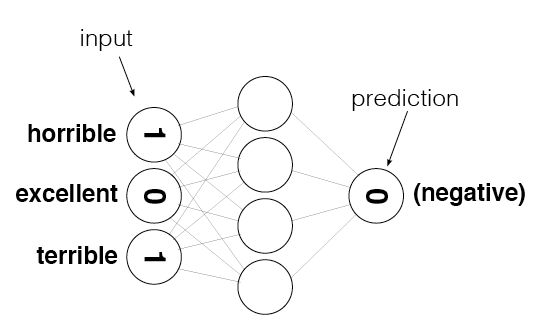

In [18]:
from IPython.display import Image

review = "This was a horrible, terrible movie."

Image(filename='sentiment_network.png')

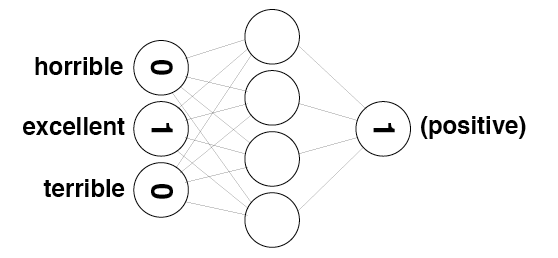

In [19]:
review = "The movie was excellent"

Image(filename='sentiment_network_pos.png')

# Step 2: Creating the Input/Output Data

In [21]:
vocab = set(total_counts.keys())
vocab_size = len(vocab)
print(vocab_size)

74074


In [22]:
list(vocab)

['',
 'wowed',
 'horndogging',
 'anxiously',
 'aapke',
 'craved',
 'walton',
 'toyota',
 'berardinelli',
 'ritters',
 'satta',
 'cheer',
 'frisbees',
 'indifferently',
 'concoction',
 'mulholland',
 'lundgren',
 'nighy',
 'misfocused',
 'parablane',
 'asked',
 'albans',
 'nhk',
 'blammo',
 'credibility',
 'pentecostal',
 'definition',
 'nopes',
 'incorrigible',
 'chubbiness',
 'owen',
 'christmastime',
 'befitting',
 'maldive',
 'attempts',
 'terribles',
 'atta',
 'dissenters',
 'unfussy',
 'triage',
 'interludes',
 'shamelessness',
 'carpethia',
 'distraction',
 'elections',
 'melding',
 'rockaroll',
 'larvae',
 'torin',
 'jrvilaturi',
 'arditi',
 'seattle',
 'hurriedly',
 'cds',
 'destructible',
 'dumbfoundingly',
 'portly',
 'allthewhile',
 'touchstones',
 'accelerate',
 'cylinders',
 'phreak',
 'larking',
 'heterosexism',
 'wildcard',
 'ruttenberg',
 'fountain',
 'projectionist',
 'bullfincher',
 'feh',
 'luckily',
 'bonehead',
 'thinkers',
 'sweetened',
 'pressly',
 'isoyg',
 'tel

In [30]:
import numpy as np

layer_0 = np.zeros((1,vocab_size))
print(layer_0.shape)
layer_0

(1, 74074)


array([[ 0.,  0.,  0., ...,  0.,  0.,  0.]])

## Word2Index

One of the simple ways to convert words to number is to replace them with corresponding word index in the vocabulary, like so.

In [33]:
word2index = {}

for i,word in enumerate(vocab):
    word2index[word] = i
word2index

{'': 0,
 'wowed': 1,
 'irrelevancy': 12323,
 'horndogging': 2,
 'aapke': 4,
 'craved': 5,
 'walton': 6,
 'berardinelli': 8,
 'ritters': 9,
 'dinheiro': 61541,
 'satta': 10,
 'cheer': 11,
 'rosenstrae': 31184,
 'frisbees': 12,
 'indifferently': 13,
 'misfocused': 18,
 'lundgren': 16,
 'nighy': 17,
 'dharam': 18366,
 'parablane': 19,
 'roedel': 61544,
 'dimitri': 12329,
 'credibility': 24,
 'nhk': 22,
 'blammo': 23,
 'pentecostal': 25,
 'anxiously': 3,
 'definition': 26,
 'nopes': 27,
 'incorrigible': 28,
 'clunkily': 12331,
 'owen': 30,
 'maldive': 33,
 'befitting': 32,
 'attempts': 34,
 'terribles': 35,
 'atta': 36,
 'unfussy': 38,
 'triage': 39,
 'interludes': 40,
 'shamelessness': 41,
 'carpethia': 42,
 'distraction': 43,
 'elections': 44,
 'rockaroll': 46,
 'repartees': 23246,
 'torin': 48,
 'jrvilaturi': 49,
 'arditi': 50,
 'seattle': 51,
 'hurriedly': 52,
 'cds': 53,
 'destructible': 54,
 'dumbfoundingly': 55,
 'ensnared': 49240,
 'cylinders': 60,
 'allthewhile': 57,
 'phreak': 61

In [83]:
# for debug
layer_0_in_words = np.empty([1, vocab_size], dtype=object) 

def update_input_layer(review):
    
    global layer_0
    global layer_0_in_words # for debug
     
    # clear out previous state, reset the layer to be all 0s
    layer_0 *= 0
    for word in review.split(" "):
        layer_0[0][word2index[word]] += 1
        
        # for debug
        layer_0_in_words[0][word2index[word]] = 'At index ' + str(word2index[word]) + ' WORD(' + word + ') with count ' + str(layer_0[0][word2index[word]]) 

update_input_layer(reviews[0])

In [84]:
print(layer_0.shape)
layer_0

(1, 74074)


array([[ 18.,   0.,   0., ...,   0.,   0.,   0.]])

In [102]:
# for debug
print(layer_0_in_words.shape, '\n')

# print review
print(reviews[0], '\n')

# word 'bromwell' appears 4 times in the review. 
print('Index of WORD(bromwell) in vocab is:', word2index['bromwell'], '\n')

for w in layer_0_in_words[0]:
    if w:
        if 'bromwell' in w:
            print('==========================================>  ', w)
        else:
            print(w)

(1, 74074) 

bromwell high is a cartoon comedy . it ran at the same time as some other programs about school life  such as  teachers  . my   years in the teaching profession lead me to believe that bromwell high  s satire is much closer to reality than is  teachers  . the scramble to survive financially  the insightful students who can see right through their pathetic teachers  pomp  the pettiness of the whole situation  all remind me of the schools i knew and their students . when i saw the episode in which a student repeatedly tried to burn down the school  i immediately recalled . . . . . . . . . at . . . . . . . . . . high . a classic line inspector i  m here to sack one of your teachers . student welcome to bromwell high . i expect that many adults of my age think that bromwell high is far fetched . what a pity that it isn  t    

Index of WORD(bromwell) in vocab is: 15734 

At index 0 WORD() with count 18.0
At index 311 WORD(immediately) with count 1.0
At index 813 WORD(age) with

In [94]:
def get_target_for_label(label):
    if(label == 'POSITIVE'):
        return 1
    else:
        return 0

In [95]:
labels[0]

'POSITIVE'

In [96]:
get_target_for_label(labels[0])

1

In [97]:
labels[1]

'NEGATIVE'

In [98]:
get_target_for_label(labels[1])

0

# Step 3: Building a Neural Network

- Create simple neural network from scratch
- 3 layer neural network
- no non-linearity in hidden layer
- use our functions to create the training data
- create a "pre_process_data" function to create vocabulary for our training data generating functions
- train over the entire corpus

In [103]:
import time
import sys
import numpy as np

class SentimentNetwork:
    def __init__(self, reviews,labels,hidden_nodes = 10, learning_rate = 0.1):
       
        # set our random number generator 
        np.random.seed(1)
    
        self.pre_process_data(reviews, labels)
        
        self.init_network(len(self.review_vocab),hidden_nodes, 1, learning_rate)
        
        
    def pre_process_data(self, reviews, labels):
        
        review_vocab = set()
        for review in reviews:
            for word in review.split(" "):
                review_vocab.add(word)
        self.review_vocab = list(review_vocab)
        
        label_vocab = set()
        for label in labels:
            label_vocab.add(label)
        
        self.label_vocab = list(label_vocab)
        
        self.review_vocab_size = len(self.review_vocab)
        self.label_vocab_size = len(self.label_vocab)
        
        self.word2index = {}
        for i, word in enumerate(self.review_vocab):
            self.word2index[word] = i
        
        self.label2index = {}
        for i, label in enumerate(self.label_vocab):
            self.label2index[label] = i
         
        
    def init_network(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        # Set number of nodes in input, hidden and output layers.
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        # Initialize weights
        self.weights_0_1 = np.zeros((self.input_nodes,self.hidden_nodes))
    
        self.weights_1_2 = np.random.normal(0.0, self.output_nodes**-0.5, 
                                                (self.hidden_nodes, self.output_nodes))
        
        self.learning_rate = learning_rate
        
        self.layer_0 = np.zeros((1,input_nodes))
    
        
    def update_input_layer(self,review):

        # clear out previous state, reset the layer to be all 0s
        self.layer_0 *= 0
        for word in review.split(" "):
            if(word in self.word2index.keys()):
                self.layer_0[0][self.word2index[word]] += 1
                
    def get_target_for_label(self,label):
        if(label == 'POSITIVE'):
            return 1
        else:
            return 0
        
    def sigmoid(self,x):
        return 1 / (1 + np.exp(-x))
    
    
    def sigmoid_output_2_derivative(self,output):
        return output * (1 - output)
    
    def train(self, training_reviews, training_labels):
        
        assert(len(training_reviews) == len(training_labels))
        
        correct_so_far = 0
        
        start = time.time()
        
        for i in range(len(training_reviews)):
            
            review = training_reviews[i]
            label = training_labels[i]
            
            #### Implement the forward pass here ####
            ### Forward pass ###

            # Input Layer
            self.update_input_layer(review)

            # Hidden layer
            layer_1 = self.layer_0.dot(self.weights_0_1)

            # Output layer
            layer_2 = self.sigmoid(layer_1.dot(self.weights_1_2))

            #### Implement the backward pass here ####
            ### Backward pass ###

            # TODO: Output error
            layer_2_error = layer_2 - self.get_target_for_label(label) # Output layer error is the difference between desired target and actual output.
            layer_2_delta = layer_2_error * self.sigmoid_output_2_derivative(layer_2)

            # TODO: Backpropagated error
            layer_1_error = layer_2_delta.dot(self.weights_1_2.T) # errors propagated to the hidden layer
            layer_1_delta = layer_1_error # hidden layer gradients - no nonlinearity so it's the same as the error

            # TODO: Update the weights
            self.weights_1_2 -= layer_1.T.dot(layer_2_delta) * self.learning_rate # update hidden-to-output weights with gradient descent step
            self.weights_0_1 -= self.layer_0.T.dot(layer_1_delta) * self.learning_rate # update input-to-hidden weights with gradient descent step

            # if the predicted value is closer to label, then error is less. thresholding error at 0.5 (half) to
            # mark it as correctly classified 
            if(np.abs(layer_2_error) < 0.5):
                correct_so_far += 1
            
            reviews_per_second = i / float(time.time() - start)
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(training_reviews)))[:4] + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] + " #Correct:" + str(correct_so_far) + " #Trained:" + str(i+1) + " Training Accuracy:" + str(correct_so_far * 100 / float(i+1))[:4] + "%")
            if(i % 2500 == 0):
                print("")
    
    def test(self, testing_reviews, testing_labels):
        
        correct = 0
        
        start = time.time()
        
        for i in range(len(testing_reviews)):
            pred = self.run(testing_reviews[i])
            if(pred == testing_labels[i]):
                correct += 1
            
            reviews_per_second = i / float(time.time() - start)
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(testing_reviews)))[:4] \
                             + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] \
                            + "% #Correct:" + str(correct) + " #Tested:" + str(i+1) + " Testing Accuracy:" + str(correct * 100 / float(i+1))[:4] + "%")
    
    def run(self, review):
        
        # Input Layer
        self.update_input_layer(review.lower())

        # Hidden layer
        layer_1 = self.layer_0.dot(self.weights_0_1)

        # Output layer
        layer_2 = self.sigmoid(layer_1.dot(self.weights_1_2))
        
        if(layer_2[0] > 0.5):
            return "POSITIVE"
        else:
            return "NEGATIVE"
        

In [104]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000], learning_rate=0.1)

In [105]:
# evaluate our model before training (just to show how horrible it is)
mlp.test(reviews[-1000:],labels[-1000:])

Progress:99.9% Speed(reviews/sec):1461.% #Correct:500 #Tested:1000 Testing Accuracy:50.0%

In [106]:
# train the network
mlp.train(reviews[:-1000],labels[:-1000])

Progress:0.0% Speed(reviews/sec):0.0 #Correct:0 #Trained:1 Training Accuracy:0.0%
Progress:10.4% Speed(reviews/sec):207.5 #Correct:1250 #Trained:2501 Training Accuracy:49.9%
Progress:20.8% Speed(reviews/sec):200.9 #Correct:2500 #Trained:5001 Training Accuracy:49.9%
Progress:31.2% Speed(reviews/sec):197.9 #Correct:3750 #Trained:7501 Training Accuracy:49.9%
Progress:41.6% Speed(reviews/sec):197.2 #Correct:5000 #Trained:10001 Training Accuracy:49.9%
Progress:52.0% Speed(reviews/sec):196.6 #Correct:6250 #Trained:12501 Training Accuracy:49.9%
Progress:62.5% Speed(reviews/sec):196.3 #Correct:7500 #Trained:15001 Training Accuracy:49.9%
Progress:72.9% Speed(reviews/sec):196.1 #Correct:8750 #Trained:17501 Training Accuracy:49.9%
Progress:83.3% Speed(reviews/sec):196.9 #Correct:10000 #Trained:20001 Training Accuracy:49.9%
Progress:93.7% Speed(reviews/sec):196.4 #Correct:11250 #Trained:22501 Training Accuracy:49.9%
Progress:99.9% Speed(reviews/sec):195.4 #Correct:11999 #Trained:24000 Training Acc

Training speed is very slow. And Training Accuracy is little less than random prediction. So something is not right. Let has reduce learning rate and see what happens.

In [107]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000], learning_rate=0.01)

In [108]:
# train the network
mlp.train(reviews[:-1000],labels[:-1000])

Progress:0.0% Speed(reviews/sec):0.0 #Correct:0 #Trained:1 Training Accuracy:0.0%
Progress:10.4% Speed(reviews/sec):288.3 #Correct:1247 #Trained:2501 Training Accuracy:49.8%
Progress:20.8% Speed(reviews/sec):292.9 #Correct:2497 #Trained:5001 Training Accuracy:49.9%
Progress:31.2% Speed(reviews/sec):282.7 #Correct:3747 #Trained:7501 Training Accuracy:49.9%
Progress:41.6% Speed(reviews/sec):280.8 #Correct:4997 #Trained:10001 Training Accuracy:49.9%
Progress:52.0% Speed(reviews/sec):279.8 #Correct:6247 #Trained:12501 Training Accuracy:49.9%
Progress:62.5% Speed(reviews/sec):279.1 #Correct:7510 #Trained:15001 Training Accuracy:50.0%
Progress:65.7% Speed(reviews/sec):278.9 #Correct:7904 #Trained:15788 Training Accuracy:50.0%

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:74: RuntimeWarning: overflow encountered in exp


Progress:72.9% Speed(reviews/sec):276.4 #Correct:8763 #Trained:17501 Training Accuracy:50.0%
Progress:83.3% Speed(reviews/sec):277.9 #Correct:10012 #Trained:20001 Training Accuracy:50.0%
Progress:93.7% Speed(reviews/sec):279.0 #Correct:11262 #Trained:22501 Training Accuracy:50.0%
Progress:99.9% Speed(reviews/sec):279.5 #Correct:12012 #Trained:24000 Training Accuracy:50.0%

Training Accuracy is just camping around 50%. We want it to be increasing over time. Let us reduce learning rate one more time.

In [109]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000], learning_rate=0.001)

In [110]:
# train the network
mlp.train(reviews[:-1000],labels[:-1000])

Progress:0.0% Speed(reviews/sec):0.0 #Correct:0 #Trained:1 Training Accuracy:0.0%
Progress:10.4% Speed(reviews/sec):280.6 #Correct:1281 #Trained:2501 Training Accuracy:51.2%
Progress:20.8% Speed(reviews/sec):263.3 #Correct:2641 #Trained:5001 Training Accuracy:52.8%
Progress:31.2% Speed(reviews/sec):261.0 #Correct:4039 #Trained:7501 Training Accuracy:53.8%
Progress:41.6% Speed(reviews/sec):259.8 #Correct:5577 #Trained:10001 Training Accuracy:55.7%
Progress:52.0% Speed(reviews/sec):259.6 #Correct:7123 #Trained:12501 Training Accuracy:56.9%
Progress:62.5% Speed(reviews/sec):262.3 #Correct:8708 #Trained:15001 Training Accuracy:58.0%
Progress:72.9% Speed(reviews/sec):265.8 #Correct:10326 #Trained:17501 Training Accuracy:59.0%
Progress:83.3% Speed(reviews/sec):265.2 #Correct:11958 #Trained:20001 Training Accuracy:59.7%
Progress:93.7% Speed(reviews/sec):265.8 #Correct:13643 #Trained:22501 Training Accuracy:60.6%
Progress:99.9% Speed(reviews/sec):266.4 #Correct:14646 #Trained:24000 Training Ac

Model seems to be converging now. But the rate of convergence is very slow. Final accuracy is also not within accceptable range. So it looks like reducing learning rate is not going to help overall.

We must investigate and find out the root cause.

# Understanding Neural Noise

In this section let us investigate Nosie vs Signal in the input. Data is where all the gold is. NN is just a machine that will dig in dirt to find gold. 

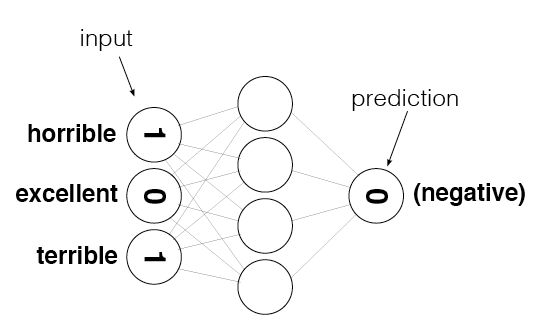

In [112]:
from IPython.display import Image
Image(filename='sentiment_network.png')

In [113]:
def update_input_layer(review):
    
    global layer_0
    
    # clear out previous state, reset the layer to be all 0s
    layer_0 *= 0
    for word in review.split(" "):
        layer_0[0][word2index[word]] += 1

update_input_layer(reviews[0])

In [116]:
layer_0

array([[ 18.,   0.,   0., ...,   0.,   0.,   0.]])

As debugged previously, that 18 (at index 0) is very high. 18xWt will dominate the weighted sum of the network output in the forward propagation. We also debugged that at index 0 in vocab the word is blank/empty. Similarly word '.' cause issue. So such words interfer with the networks performance negatively. 

In [117]:
review_counter = Counter()

In [118]:
for word in reviews[0].split(" "):
    review_counter[word] += 1

In [119]:
review_counter.most_common()

[('.', 27),
 ('', 18),
 ('the', 9),
 ('to', 6),
 ('i', 5),
 ('high', 5),
 ('a', 4),
 ('bromwell', 4),
 ('teachers', 4),
 ('of', 4),
 ('is', 4),
 ('that', 4),
 ('me', 2),
 ('students', 2),
 ('it', 2),
 ('their', 2),
 ('student', 2),
 ('school', 2),
 ('my', 2),
 ('in', 2),
 ('as', 2),
 ('at', 2),
 ('pathetic', 1),
 ('expect', 1),
 ('what', 1),
 ('can', 1),
 ('recalled', 1),
 ('comedy', 1),
 ('which', 1),
 ('about', 1),
 ('burn', 1),
 ('here', 1),
 ('episode', 1),
 ('programs', 1),
 ('your', 1),
 ('profession', 1),
 ('other', 1),
 ('many', 1),
 ('see', 1),
 ('pomp', 1),
 ('believe', 1),
 ('think', 1),
 ('teaching', 1),
 ('welcome', 1),
 ('schools', 1),
 ('fetched', 1),
 ('adults', 1),
 ('t', 1),
 ('pity', 1),
 ('classic', 1),
 ('all', 1),
 ('saw', 1),
 ('cartoon', 1),
 ('lead', 1),
 ('whole', 1),
 ('sack', 1),
 ('through', 1),
 ('age', 1),
 ('situation', 1),
 ('much', 1),
 ('ran', 1),
 ('scramble', 1),
 ('survive', 1),
 ('down', 1),
 ('who', 1),
 ('remind', 1),
 ('m', 1),
 ('same', 1),
 (

See how many 'noisy' words are dominating in our network. These dominant words have nothing to do with sentiment. We should reduce/eliminate such noise. 

May be using word counts was a bad idea. Because counts is not highlighting the signal. 

# Step 4: Reducing Noise in our Input Data

Let us modify our network such that we don't weight inputs with counts anymore. That means now input will be always 1 or 0; not the number of times word appeared in the input review. If we make this change then all words (including filler words) will contribute equally in the weighted sum. 

So make following change in *update_input_layer()* function:

`self.layer_0[0][self.word2index[word]] += 1`

to 

`self.layer_0[0][self.word2index[word]] = 1`


In [123]:
import time
import sys
import numpy as np

# Let's tweak our network from before to model these phenomena
class SentimentNetwork:
    def __init__(self, reviews,labels,hidden_nodes = 10, learning_rate = 0.1):
       
        # set our random number generator 
        np.random.seed(1)
    
        self.pre_process_data(reviews, labels)
        
        self.init_network(len(self.review_vocab),hidden_nodes, 1, learning_rate)
        
        
    def pre_process_data(self, reviews, labels):
        
        review_vocab = set()
        for review in reviews:
            for word in review.split(" "):
                review_vocab.add(word)
        self.review_vocab = list(review_vocab)
        
        label_vocab = set()
        for label in labels:
            label_vocab.add(label)
        
        self.label_vocab = list(label_vocab)
        
        self.review_vocab_size = len(self.review_vocab)
        self.label_vocab_size = len(self.label_vocab)
        
        self.word2index = {}
        for i, word in enumerate(self.review_vocab):
            self.word2index[word] = i
        
        self.label2index = {}
        for i, label in enumerate(self.label_vocab):
            self.label2index[label] = i
         
        
    def init_network(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        # Set number of nodes in input, hidden and output layers.
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        # Initialize weights
        self.weights_0_1 = np.zeros((self.input_nodes,self.hidden_nodes))
    
        self.weights_1_2 = np.random.normal(0.0, self.output_nodes**-0.5, 
                                                (self.hidden_nodes, self.output_nodes))
        
        self.learning_rate = learning_rate
        
        self.layer_0 = np.zeros((1,input_nodes))
    
        
    def update_input_layer(self,review):

        # clear out previous state, reset the layer to be all 0s
        self.layer_0 *= 0
        for word in review.split(" "):
            if(word in self.word2index.keys()):
                self.layer_0[0][self.word2index[word]] = 1
                
    def get_target_for_label(self,label):
        if(label == 'POSITIVE'):
            return 1
        else:
            return 0
        
    def sigmoid(self,x):
        return 1 / (1 + np.exp(-x))
    
    
    def sigmoid_output_2_derivative(self,output):
        return output * (1 - output)
    
    def train(self, training_reviews, training_labels):
        
        assert(len(training_reviews) == len(training_labels))
        
        correct_so_far = 0
        
        start = time.time()
        
        for i in range(len(training_reviews)):
            
            review = training_reviews[i]
            label = training_labels[i]
            
            #### Implement the forward pass here ####
            ### Forward pass ###

            # Input Layer
            self.update_input_layer(review)

            # Hidden layer
            layer_1 = self.layer_0.dot(self.weights_0_1)

            # Output layer
            layer_2 = self.sigmoid(layer_1.dot(self.weights_1_2))

            #### Implement the backward pass here ####
            ### Backward pass ###

            # TODO: Output error
            layer_2_error = layer_2 - self.get_target_for_label(label) # Output layer error is the difference between desired target and actual output.
            layer_2_delta = layer_2_error * self.sigmoid_output_2_derivative(layer_2)

            # TODO: Backpropagated error
            layer_1_error = layer_2_delta.dot(self.weights_1_2.T) # errors propagated to the hidden layer
            layer_1_delta = layer_1_error # hidden layer gradients - no nonlinearity so it's the same as the error

            # TODO: Update the weights
            self.weights_1_2 -= layer_1.T.dot(layer_2_delta) * self.learning_rate # update hidden-to-output weights with gradient descent step
            self.weights_0_1 -= self.layer_0.T.dot(layer_1_delta) * self.learning_rate # update input-to-hidden weights with gradient descent step

            if(np.abs(layer_2_error) < 0.5):
                correct_so_far += 1
            
            reviews_per_second = i / float(time.time() - start)
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(training_reviews)))[:4] + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] + " #Correct:" + str(correct_so_far) + " #Trained:" + str(i+1) + " Training Accuracy:" + str(correct_so_far * 100 / float(i+1))[:4] + "%")
            if(i % 2500 == 0):
                print("")
    
    def test(self, testing_reviews, testing_labels):
        
        correct = 0
        
        start = time.time()
        
        for i in range(len(testing_reviews)):
            pred = self.run(testing_reviews[i])
            if(pred == testing_labels[i]):
                correct += 1
            
            reviews_per_second = i / float(time.time() - start)
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(testing_reviews)))[:4] \
                             + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] \
                            + "% #Correct:" + str(correct) + " #Tested:" + str(i+1) + " Testing Accuracy:" + str(correct * 100 / float(i+1))[:4] + "%")
    
    def run(self, review):
        
        # Input Layer
        self.update_input_layer(review.lower())

        # Hidden layer
        layer_1 = self.layer_0.dot(self.weights_0_1)

        # Output layer
        layer_2 = self.sigmoid(layer_1.dot(self.weights_1_2))
        
        if(layer_2[0] > 0.5):
            return "POSITIVE"
        else:
            return "NEGATIVE"
        

In [124]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000], learning_rate=0.1)

In [125]:
mlp.train(reviews[:-1000],labels[:-1000])

Progress:0.0% Speed(reviews/sec):0.0 #Correct:0 #Trained:1 Training Accuracy:0.0%
Progress:10.4% Speed(reviews/sec):272.9 #Correct:1813 #Trained:2501 Training Accuracy:72.4%
Progress:20.8% Speed(reviews/sec):275.4 #Correct:3794 #Trained:5001 Training Accuracy:75.8%
Progress:31.2% Speed(reviews/sec):278.1 #Correct:5877 #Trained:7501 Training Accuracy:78.3%
Progress:41.6% Speed(reviews/sec):283.3 #Correct:8007 #Trained:10001 Training Accuracy:80.0%
Progress:52.0% Speed(reviews/sec):283.4 #Correct:10132 #Trained:12501 Training Accuracy:81.0%
Progress:62.5% Speed(reviews/sec):282.1 #Correct:12270 #Trained:15001 Training Accuracy:81.7%
Progress:72.9% Speed(reviews/sec):280.1 #Correct:14390 #Trained:17501 Training Accuracy:82.2%
Progress:83.3% Speed(reviews/sec):282.4 #Correct:16574 #Trained:20001 Training Accuracy:82.8%
Progress:93.7% Speed(reviews/sec):284.0 #Correct:18760 #Trained:22501 Training Accuracy:83.3%
Progress:99.9% Speed(reviews/sec):284.7 #Correct:20084 #Trained:24000 Training 

In [126]:
# evaluate our model 
mlp.test(reviews[-1000:],labels[-1000:])

Progress:99.9% Speed(reviews/sec):1445.% #Correct:852 #Tested:1000 Testing Accuracy:85.2%

By toning down the noise, we are now able to see good jump in the Training Accuracy. This is great. 

But the training speed is still stuck at 200+ and is very bad. Slow training means we cannot train on large dataset in reasonable time. Let us investigate more.

# Analyzing Inefficiencies in our Network

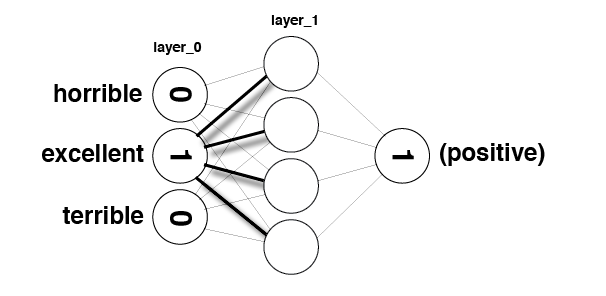

In [127]:
Image(filename='sentiment_network_sparse.png')

We are training on very large input vector, about 74K value. Out of which only handful are 1. The contibution of 0 input the weight sum is 0. These operations are wasteful. 

This initution can be explained with a fake layer_0 and related calcuations, like so.

In [141]:
layer_0 = np.zeros(10)

In [142]:
layer_0

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [143]:
layer_0[4] = 1
layer_0[9] = 1

In [144]:
layer_0

array([ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.])

In [145]:
weights_0_1 = np.random.randn(10,5)

In [146]:
layer_0.dot(weights_0_1)

array([-0.05294571,  0.53979838, -0.76713921,  0.14383314,  0.23091427])

In [147]:
indices = [4,9]

In [148]:
layer_1 = np.zeros(5)

In [149]:
for index in indices:
    layer_1 += (1 * weights_0_1[index])

In [150]:
layer_1

array([-0.05294571,  0.53979838, -0.76713921,  0.14383314,  0.23091427])

Outputs of steps [146] & [150] are same. Also multiplying by 1 in step [149] is unnecessary. We should avoid these unnecessary calculations. This should improve performance.

# Step 5: Making our Network More Efficient

In *train()* method look for CHANGE_BEGIN, CHANGE_END tokens

In [151]:
import time
import sys

# Let's tweak our network from before to model these phenomena
class SentimentNetwork:
    def __init__(self, reviews,labels,hidden_nodes = 10, learning_rate = 0.1):
       
        np.random.seed(1)
    
        self.pre_process_data(reviews)
        
        self.init_network(len(self.review_vocab),hidden_nodes, 1, learning_rate)
        
        
    def pre_process_data(self,reviews):
        
        review_vocab = set()
        for review in reviews:
            for word in review.split(" "):
                review_vocab.add(word)
        self.review_vocab = list(review_vocab)
        
        label_vocab = set()
        for label in labels:
            label_vocab.add(label)
        
        self.label_vocab = list(label_vocab)
        
        self.review_vocab_size = len(self.review_vocab)
        self.label_vocab_size = len(self.label_vocab)
        
        self.word2index = {}
        for i, word in enumerate(self.review_vocab):
            self.word2index[word] = i
        
        self.label2index = {}
        for i, label in enumerate(self.label_vocab):
            self.label2index[label] = i
         
        
    def init_network(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        # Set number of nodes in input, hidden and output layers.
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        # Initialize weights
        self.weights_0_1 = np.zeros((self.input_nodes,self.hidden_nodes))
    
        self.weights_1_2 = np.random.normal(0.0, self.output_nodes**-0.5, 
                                                (self.hidden_nodes, self.output_nodes))
        
        self.learning_rate = learning_rate
        
        self.layer_0 = np.zeros((1,input_nodes))
        self.layer_1 = np.zeros((1,hidden_nodes))
        
    def sigmoid(self,x):
        return 1 / (1 + np.exp(-x))
    
    
    def sigmoid_output_2_derivative(self,output):
        return output * (1 - output)
    
    def update_input_layer(self,review):

        # clear out previous state, reset the layer to be all 0s
        self.layer_0 *= 0
        for word in review.split(" "):
            self.layer_0[0][self.word2index[word]] = 1

    def get_target_for_label(self,label):
        if(label == 'POSITIVE'):
            return 1
        else:
            return 0
        
    def train(self, training_reviews_raw, training_labels):
        
        # CHANGE_BEGING
        training_reviews = list()
        for review in training_reviews_raw:
            indices = set()
            for word in review.split(" "):
                if(word in self.word2index.keys()):
                    indices.add(self.word2index[word])
            training_reviews.append(list(indices))
            
        # we have collected indices of the vector where 1 will appear
        
        # CHANGE_END
        
        assert(len(training_reviews) == len(training_labels))
        
        correct_so_far = 0
        
        start = time.time()
        
        for i in range(len(training_reviews)):
            
            review = training_reviews[i]
            label = training_labels[i]
            
            #### Implement the forward pass here ####
            ### Forward pass ###

            # CHANGE_BEGIN
            # Input Layer
            # self.update_input_layer(review)
            # now we can completely skip input vector generation
            
            
            # Hidden layer
            # layer_1 = self.layer_0.dot(self.weights_0_1)
            self.layer_1 *= 0
            for index in review:
                self.layer_1 += self.weights_0_1[index]
            
            # now we skip mat-mul operation. skip 0 index operation. 
            # straight go to adding appropriate weights to layer1
            # CHANGE_END
            
            # Output layer
            layer_2 = self.sigmoid(self.layer_1.dot(self.weights_1_2))

            #### Implement the backward pass here ####
            ### Backward pass ###

            # Output error
            layer_2_error = layer_2 - self.get_target_for_label(label) # Output layer error is the difference between desired target and actual output.
            layer_2_delta = layer_2_error * self.sigmoid_output_2_derivative(layer_2)

            # Backpropagated error
            layer_1_error = layer_2_delta.dot(self.weights_1_2.T) # errors propagated to the hidden layer
            layer_1_delta = layer_1_error # hidden layer gradients - no nonlinearity so it's the same as the error

            # Update the weights
            self.weights_1_2 -= self.layer_1.T.dot(layer_2_delta) * self.learning_rate # update hidden-to-output weights with gradient descent step
            
            # CHANGE_BEGIN
            for index in review:
                self.weights_0_1[index] -= layer_1_delta[0] * self.learning_rate # update input-to-hidden weights with gradient descent step
            # CHANGE_END
            
            if(np.abs(layer_2_error) < 0.5):
                correct_so_far += 1
            
            reviews_per_second = i / float(time.time() - start)
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(training_reviews)))[:4] + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] + " #Correct:" + str(correct_so_far) + " #Trained:" + str(i+1) + " Training Accuracy:" + str(correct_so_far * 100 / float(i+1))[:4] + "%")
        
    
    def test(self, testing_reviews, testing_labels):
        
        correct = 0
        
        start = time.time()
        
        for i in range(len(testing_reviews)):
            pred = self.run(testing_reviews[i])
            if(pred == testing_labels[i]):
                correct += 1
            
            reviews_per_second = i / float(time.time() - start)
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(testing_reviews)))[:4] \
                             + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] \
                            + "% #Correct:" + str(correct) + " #Tested:" + str(i+1) + " Testing Accuracy:" + str(correct * 100 / float(i+1))[:4] + "%")
    
    def run(self, review):
        
        # Input Layer


        # Hidden layer
        self.layer_1 *= 0
        unique_indices = set()
        for word in review.lower().split(" "):
            if word in self.word2index.keys():
                unique_indices.add(self.word2index[word])
        for index in unique_indices:
            self.layer_1 += self.weights_0_1[index]
        
        # Output layer
        layer_2 = self.sigmoid(self.layer_1.dot(self.weights_1_2))
        
        if(layer_2[0] > 0.5):
            return "POSITIVE"
        else:
            return "NEGATIVE"
        

In [152]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000], learning_rate=0.1)

In [153]:
mlp.train(reviews[:-1000],labels[:-1000])

Progress:99.9% Speed(reviews/sec):1300. #Correct:20121 #Trained:24000 Training Accuracy:83.8%

In [154]:
# evaluate our model before training (just to show how horrible it is)
mlp.test(reviews[-1000:],labels[-1000:])

Progress:99.9% Speed(reviews/sec):1931.% #Correct:845 #Tested:1000 Testing Accuracy:84.5%

Yay! we have achieved 10x speed now. We are processing 1300 reviews per second. Excellent. 

With added speed, we can increase the amount of data (or Epochs in this case). This should boost Traning Accuracy little bit. 

In [155]:
mlp.train(reviews[:-1000] * 2,labels[:-1000] * 2)

Progress:99.9% Speed(reviews/sec):1275. #Correct:43898 #Trained:48000 Training Accuracy:91.4%

As expected training accuracy has jumped to 90% range. Excellent!

# Further Noise Reduction

Here we will try to further increase signal to noise ratio.

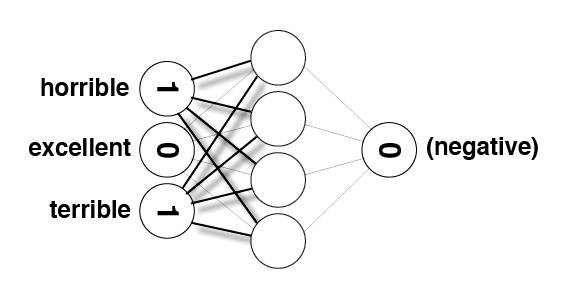

In [158]:
Image(filename='sentiment_network_sparse_2.png')

In [159]:
# words most frequently seen in a review with a "POSITIVE" label
pos_neg_ratios.most_common()

[('edie', 4.6913478822291435),
 ('paulie', 4.0775374439057197),
 ('felix', 3.1527360223636558),
 ('polanski', 2.8233610476132043),
 ('matthau', 2.8067217286092401),
 ('victoria', 2.6810215287142909),
 ('mildred', 2.6026896854443837),
 ('gandhi', 2.5389738710582761),
 ('flawless', 2.451005098112319),
 ('superbly', 2.2600254785752498),
 ('perfection', 2.1594842493533721),
 ('astaire', 2.1400661634962708),
 ('captures', 2.0386195471595809),
 ('voight', 2.0301704926730531),
 ('wonderfully', 2.0218960560332353),
 ('powell', 1.9783454248084671),
 ('brosnan', 1.9547990964725592),
 ('lily', 1.9203768470501485),
 ('bakshi', 1.9029851043382795),
 ('lincoln', 1.9014583864844796),
 ('refreshing', 1.8551812956655511),
 ('breathtaking', 1.8481124057791867),
 ('bourne', 1.8478489358790986),
 ('lemmon', 1.8458266904983307),
 ('delightful', 1.8002701588959635),
 ('flynn', 1.7996646487351682),
 ('andrews', 1.7764919970972666),
 ('homer', 1.7692866133759964),
 ('beautifully', 1.7626953362841438),
 ('socc

In [160]:
# words most frequently seen in a review with a "NEGATIVE" label
list(reversed(pos_neg_ratios.most_common()))[0:30]

[('boll', -4.0778152602708904),
 ('uwe', -3.9218753018711578),
 ('seagal', -3.3202501058581921),
 ('unwatchable', -3.0269848170580955),
 ('stinker', -2.9876839403711624),
 ('mst', -2.7753833211707968),
 ('incoherent', -2.7641396677532537),
 ('unfunny', -2.5545257844967644),
 ('waste', -2.4907515123361046),
 ('blah', -2.4475792789485005),
 ('horrid', -2.3715779644809971),
 ('pointless', -2.3451073877136341),
 ('atrocious', -2.3187369339642556),
 ('redeeming', -2.2667790015910296),
 ('prom', -2.2601040980178784),
 ('drivel', -2.2476029585766928),
 ('lousy', -2.2118080125207054),
 ('worst', -2.1930856334332267),
 ('laughable', -2.172468615469592),
 ('awful', -2.1385076866397488),
 ('poorly', -2.1326133844207011),
 ('wasting', -2.1178155545614512),
 ('remotely', -2.111046881095167),
 ('existent', -2.0024805005437076),
 ('boredom', -1.9241486572738005),
 ('miserably', -1.9216610938019989),
 ('sucks', -1.9166645809588516),
 ('uninspired', -1.9131499212248517),
 ('lame', -1.9117232884159072),

In [161]:
from bokeh.models import ColumnDataSource, LabelSet
from bokeh.plotting import figure, show, output_file
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [162]:
hist, edges = np.histogram(list(map(lambda x:x[1],pos_neg_ratios.most_common())), density=True, bins=100, normed=True)

p = figure(tools="pan,wheel_zoom,reset,save",
           toolbar_location="above",
           title="Word Positive/Negative Affinity Distribution")
p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], line_color="#555555")
show(p)

Most of the filler words are in middle (or in large amounts). Sentiment words are on the arms of the graphs. Let us get rid of the filler words (.,the,an etc) which do not have any predictive power. 

In [163]:
frequency_frequency = Counter()

for word, cnt in total_counts.most_common():
    frequency_frequency[cnt] += 1

In [164]:
hist, edges = np.histogram(list(map(lambda x:x[1],frequency_frequency.most_common())), density=True, bins=100, normed=True)

p = figure(tools="pan,wheel_zoom,reset,save",
           toolbar_location="above",
           title="The frequency distribution of the words in our corpus")
p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], line_color="#555555")
show(p)

This graph shows that certain words are way too many. In NLP it is a common practice to eliminate such outliers. 

# Step 6: Reducing Noise by Strategically Reducing the Vocabulary

Most of changes are in *pre_process_data()* method. Look for CHANGE_BEGIN, CHANGE_END tokens in the code.

In [165]:
import time
import sys
import numpy as np

# Let's tweak our network from before to model these phenomena
class SentimentNetwork:
    def __init__(self, reviews,labels,min_count = 10,polarity_cutoff = 0.1,hidden_nodes = 10, learning_rate = 0.1):
       
        np.random.seed(1)
    
        self.pre_process_data(reviews, polarity_cutoff, min_count)
        
        self.init_network(len(self.review_vocab),hidden_nodes, 1, learning_rate)
        
    # CHANGE_BEGIN
    # now we have added new args: polarity_cutoff, min_count
    def pre_process_data(self,reviews, polarity_cutoff, min_count):
        
        positive_counts = Counter()
        negative_counts = Counter()
        total_counts = Counter()

        for i in range(len(reviews)):
            if(labels[i] == 'POSITIVE'):
                for word in reviews[i].split(" "):
                    positive_counts[word] += 1
                    total_counts[word] += 1
            else:
                for word in reviews[i].split(" "):
                    negative_counts[word] += 1
                    total_counts[word] += 1

        pos_neg_ratios = Counter()

        for term,cnt in list(total_counts.most_common()):
            if(cnt >= 50):
                pos_neg_ratio = positive_counts[term] / float(negative_counts[term]+1)
                pos_neg_ratios[term] = pos_neg_ratio

        for word,ratio in pos_neg_ratios.most_common():
            if(ratio > 1):
                pos_neg_ratios[word] = np.log(ratio)
            else:
                pos_neg_ratios[word] = -np.log((1 / (ratio + 0.01)))
        
        review_vocab = set()
        for review in reviews:
            for word in review.split(" "):
                if(total_counts[word] > min_count): # CHANGE_BEGIN. see min_count, polarity_cutoff in use
                    if(word in pos_neg_ratios.keys()):
                        if((pos_neg_ratios[word] >= polarity_cutoff) or (pos_neg_ratios[word] <= -polarity_cutoff)):
                            review_vocab.add(word)
                    else:
                        review_vocab.add(word)
        self.review_vocab = list(review_vocab)
        
        label_vocab = set()
        for label in labels:
            label_vocab.add(label)
        
        self.label_vocab = list(label_vocab)
        
        self.review_vocab_size = len(self.review_vocab)
        self.label_vocab_size = len(self.label_vocab)
        
        self.word2index = {}
        for i, word in enumerate(self.review_vocab):
            self.word2index[word] = i
        
        self.label2index = {}
        for i, label in enumerate(self.label_vocab):
            self.label2index[label] = i
         
        
    def init_network(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        # Set number of nodes in input, hidden and output layers.
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        # Initialize weights
        self.weights_0_1 = np.zeros((self.input_nodes,self.hidden_nodes))
    
        self.weights_1_2 = np.random.normal(0.0, self.output_nodes**-0.5, 
                                                (self.hidden_nodes, self.output_nodes))
        
        self.learning_rate = learning_rate
        
        self.layer_0 = np.zeros((1,input_nodes))
        self.layer_1 = np.zeros((1,hidden_nodes))
        
    def sigmoid(self,x):
        return 1 / (1 + np.exp(-x))
    
    
    def sigmoid_output_2_derivative(self,output):
        return output * (1 - output)
    
    def update_input_layer(self,review):

        # clear out previous state, reset the layer to be all 0s
        self.layer_0 *= 0
        for word in review.split(" "):
            self.layer_0[0][self.word2index[word]] = 1

    def get_target_for_label(self,label):
        if(label == 'POSITIVE'):
            return 1
        else:
            return 0
        
    def train(self, training_reviews_raw, training_labels):
        
        training_reviews = list()
        for review in training_reviews_raw:
            indices = set()
            for word in review.split(" "):
                if(word in self.word2index.keys()):
                    indices.add(self.word2index[word])
            training_reviews.append(list(indices))
        
        assert(len(training_reviews) == len(training_labels))
        
        correct_so_far = 0
        
        start = time.time()
        
        for i in range(len(training_reviews)):
            
            review = training_reviews[i]
            label = training_labels[i]
            
            #### Implement the forward pass here ####
            ### Forward pass ###

            # Input Layer

            # Hidden layer
            # layer_1 = self.layer_0.dot(self.weights_0_1)
            self.layer_1 *= 0
            for index in review:
                self.layer_1 += self.weights_0_1[index]
            
            # Output layer
            layer_2 = self.sigmoid(self.layer_1.dot(self.weights_1_2))

            #### Implement the backward pass here ####
            ### Backward pass ###

            # Output error
            layer_2_error = layer_2 - self.get_target_for_label(label) # Output layer error is the difference between desired target and actual output.
            layer_2_delta = layer_2_error * self.sigmoid_output_2_derivative(layer_2)

            # Backpropagated error
            layer_1_error = layer_2_delta.dot(self.weights_1_2.T) # errors propagated to the hidden layer
            layer_1_delta = layer_1_error # hidden layer gradients - no nonlinearity so it's the same as the error

            # Update the weights
            self.weights_1_2 -= self.layer_1.T.dot(layer_2_delta) * self.learning_rate # update hidden-to-output weights with gradient descent step
            
            for index in review:
                self.weights_0_1[index] -= layer_1_delta[0] * self.learning_rate # update input-to-hidden weights with gradient descent step

            if(layer_2 >= 0.5 and label == 'POSITIVE'):
                correct_so_far += 1
            if(layer_2 < 0.5 and label == 'NEGATIVE'):
                correct_so_far += 1
            
            reviews_per_second = i / float(time.time() - start)
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(training_reviews)))[:4] + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] + " #Correct:" + str(correct_so_far) + " #Trained:" + str(i+1) + " Training Accuracy:" + str(correct_so_far * 100 / float(i+1))[:4] + "%")
        
    
    def test(self, testing_reviews, testing_labels):
        
        correct = 0
        
        start = time.time()
        
        for i in range(len(testing_reviews)):
            pred = self.run(testing_reviews[i])
            if(pred == testing_labels[i]):
                correct += 1
            
            reviews_per_second = i / float(time.time() - start)
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(testing_reviews)))[:4] \
                             + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] \
                            + "% #Correct:" + str(correct) + " #Tested:" + str(i+1) + " Testing Accuracy:" + str(correct * 100 / float(i+1))[:4] + "%")
    
    def run(self, review):
        
        # Input Layer


        # Hidden layer
        self.layer_1 *= 0
        unique_indices = set()
        for word in review.lower().split(" "):
            if word in self.word2index.keys():
                unique_indices.add(self.word2index[word])
        for index in unique_indices:
            self.layer_1 += self.weights_0_1[index]
        
        # Output layer
        layer_2 = self.sigmoid(self.layer_1.dot(self.weights_1_2))
        
        if(layer_2[0] >= 0.5):
            return "POSITIVE"
        else:
            return "NEGATIVE"
        

In [166]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000],min_count=20,polarity_cutoff=0.05,learning_rate=0.01)

In [167]:
mlp.train(reviews[:-1000],labels[:-1000])

Progress:99.9% Speed(reviews/sec):1383. #Correct:20461 #Trained:24000 Training Accuracy:85.2%

In [168]:
mlp.test(reviews[-1000:],labels[-1000:])

Progress:99.9% Speed(reviews/sec):2169.% #Correct:859 #Tested:1000 Testing Accuracy:85.9%

There is some Testing Accuracy improvement, but not a whole lot. Let us crank up out thresholds. 

In [169]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000],min_count=20,polarity_cutoff=0.8,learning_rate=0.01)

In [170]:
mlp.train(reviews[:-1000],labels[:-1000])

Progress:99.9% Speed(reviews/sec):7006. #Correct:20552 #Trained:24000 Training Accuracy:85.6%

In [171]:
mlp.test(reviews[-1000:],labels[-1000:])

Progress:99.9% Speed(reviews/sec):6428.% #Correct:822 #Tested:1000 Testing Accuracy:82.2%

Wow! Speed has increased a lot. but lost little bit in accuracy/quality. This is speed/quality tradeoff in production.

This is the kind of approximation that Word2Vec does and performs much much better than any rigourous traditional models.


# Analysis: What's Going on in the Weights?


In [172]:
mlp_full = SentimentNetwork(reviews[:-1000],labels[:-1000],min_count=0,polarity_cutoff=0,learning_rate=0.01)

In [173]:
mlp_full.train(reviews[:-1000],labels[:-1000])

Progress:99.9% Speed(reviews/sec):1152. #Correct:20335 #Trained:24000 Training Accuracy:84.7%

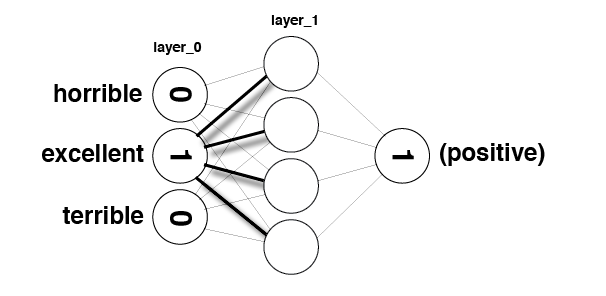

In [174]:
Image(filename='sentiment_network_sparse.png')

Network is essentially doing weighted sum. Weights are like features. Here both 'horrible' and 'terrible' are trying to influence the output in the similar way. So by back propagation they both will have similar weights too.

In [175]:
def get_most_similar_words(focus = "horrible"):
    most_similar = Counter()

    for word in mlp_full.word2index.keys():
        most_similar[word] = np.dot(mlp_full.weights_0_1[mlp_full.word2index[word]],mlp_full.weights_0_1[mlp_full.word2index[focus]])
    
    return most_similar.most_common()

In [176]:
get_most_similar_words("excellent")

[('excellent', 0.13672950757352462),
 ('perfect', 0.12548286087225935),
 ('amazing', 0.091827633925999658),
 ('today', 0.090223662694414161),
 ('wonderful', 0.089355976962214576),
 ('fun', 0.087504466674206832),
 ('great', 0.087141758882291989),
 ('best', 0.085810885617880583),
 ('liked', 0.077697629123843398),
 ('definitely', 0.076628781406965996),
 ('brilliant', 0.073423858769278982),
 ('loved', 0.073285428928122121),
 ('favorite', 0.072781136036160737),
 ('superb', 0.071736207178505026),
 ('fantastic', 0.07092219191626617),
 ('job', 0.069160617207634043),
 ('incredible', 0.066424077952614388),
 ('enjoyable', 0.065632560502888793),
 ('rare', 0.064819212662615047),
 ('highly', 0.063889453350970501),
 ('enjoyed', 0.062127546101812939),
 ('wonderfully', 0.062055178604090135),
 ('perfectly', 0.061093208811887352),
 ('fascinating', 0.060663547937493859),
 ('bit', 0.059655427045653041),
 ('gem', 0.059510859296156758),
 ('outstanding', 0.058860808147082978),
 ('beautiful', 0.058613934703162

In [177]:
get_most_similar_words("terrible")

[('worst', 0.16966107259049851),
 ('awful', 0.12026847019691247),
 ('waste', 0.11945367265311008),
 ('poor', 0.092758887574435539),
 ('terrible', 0.091425387197728011),
 ('dull', 0.084209271678223632),
 ('poorly', 0.081241544516042055),
 ('disappointment', 0.080064759621368733),
 ('fails', 0.078599773723337554),
 ('disappointing', 0.077339485480323392),
 ('boring', 0.077127858748012937),
 ('unfortunately', 0.075502449705859079),
 ('worse', 0.070601835364194676),
 ('mess', 0.070564299623590454),
 ('stupid', 0.069484822832543064),
 ('badly', 0.0668889036662286),
 ('annoying', 0.065687021903374193),
 ('bad', 0.063093814537572165),
 ('save', 0.062880597495865762),
 ('disappointed', 0.062692353812072901),
 ('wasted', 0.061387183028051316),
 ('supposed', 0.060985452957725172),
 ('horrible', 0.060121772339380146),
 ('laughable', 0.058698406285467672),
 ('crap', 0.05810452866788459),
 ('basically', 0.057218840369636197),
 ('nothing', 0.057158220043034232),
 ('ridiculous', 0.056905481068931459)

Network has figured out Sentiment words. Honestly it still does not know that meaning of the words, but it has figured out that these words influence the output either 1 or 0 together. Words are related just in the context of output training.

## Let us Visualize word vector space in 2D using TSNE

In [182]:
import matplotlib.colors as colors

words_to_visualize = list()
for word, ratio in pos_neg_ratios.most_common(500):
    if(word in mlp_full.word2index.keys()):
        words_to_visualize.append(word)
    
for word, ratio in list(reversed(pos_neg_ratios.most_common()))[0:500]:
    if(word in mlp_full.word2index.keys()):
        words_to_visualize.append(word)

In [183]:
pos = 0
neg = 0

colors_list = list()
vectors_list = list()
for word in words_to_visualize:
    if word in pos_neg_ratios.keys():
        vectors_list.append(mlp_full.weights_0_1[mlp_full.word2index[word]])
        if(pos_neg_ratios[word] > 0):
            pos+=1
            colors_list.append("#00ff00")
        else:
            neg+=1
            colors_list.append("#000000")
    

In [184]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
words_top_ted_tsne = tsne.fit_transform(vectors_list)

In [185]:
p = figure(tools="pan,wheel_zoom,reset,save",
           toolbar_location="above",
           title="vector T-SNE for most polarized words")

source = ColumnDataSource(data=dict(x1=words_top_ted_tsne[:,0],
                                    x2=words_top_ted_tsne[:,1],
                                    names=words_to_visualize))

p.scatter(x="x1", y="x2", size=8, source=source,color=colors_list)

word_labels = LabelSet(x="x1", y="x2", text="names", y_offset=6,
                  text_font_size="8pt", text_color="#555555",
                  source=source, text_align='center')
p.add_layout(word_labels)

show(p)

# green indicates positive words, black indicates negative words

Network is able to cluster words by Sentiment. It did all that by training.

This is Awesome! Thank you for your interest.